In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import os
import sys
from tabulate import tabulate

colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#535154', 'black', '#F6C85F']

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_2115579/1845622951.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [13]:
OUT_DIR="/media/SSD/paper_data/"

In [14]:
accuracies = pd.read_csv(OUT_DIR+"/sakura/accuracies/accuracies_incremental_averaged.csv", index_col=None)

<Figure size 432x288 with 0 Axes>

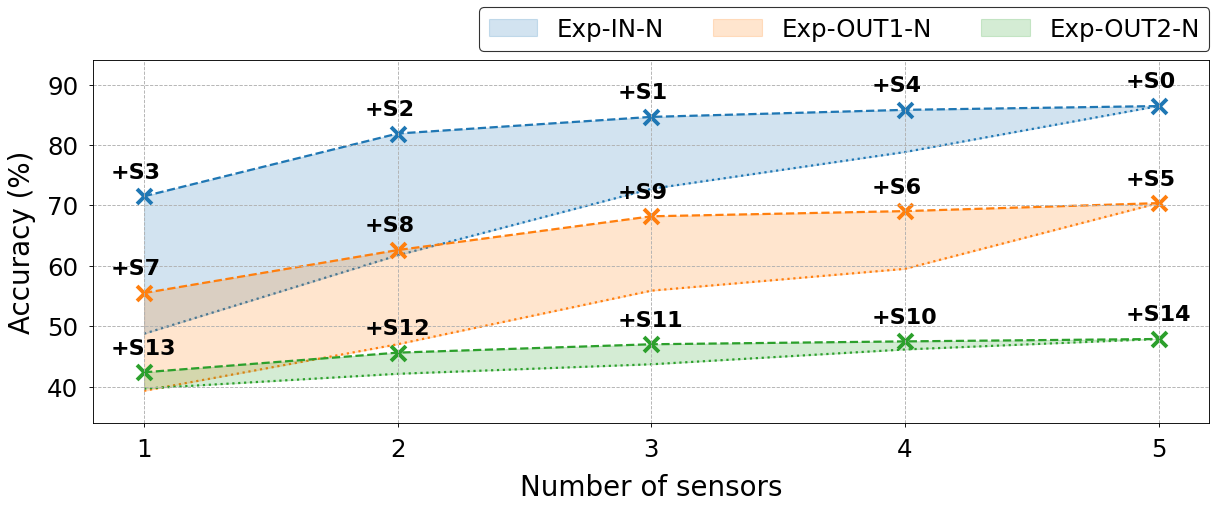

In [29]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

#plt.title("Average sensor trace")

ax.set_xlabel('Number of sensors', fontsize=25, labelpad=10)
ax.set_ylabel('Accuracy (%)', fontsize=25, labelpad=10)

ax.set_xticks([1, 2, 3, 4, 5])
ax.grid(visible=True, which='major', linestyle='--')
ax.set_ylim([34, 94])

datasets = list(accuracies.dataset.unique())
datasets.remove("Exp-out1-random")
move = [0.132, 0.132, 0.132, 0.132, 0.132]
#move = [0.0, 0.0, 0.0, 0.0, 0.0]

for dataset_id, dataset in enumerate(datasets):
    
    accuracies_best = list(accuracies[(accuracies.dataset==dataset) & (accuracies.type=='best')].sort_values(['n_sensors'])['accuracy'])
    accuracies_worst = list(accuracies[(accuracies.dataset==dataset) & (accuracies.type=='worst')].sort_values(['n_sensors'])['accuracy'])

    ax.plot(range(1, 6, 1), accuracies_best, zorder=1, linewidth='2', linestyle='--', color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    ax.scatter(range(1, 6, 1), accuracies_best, zorder=1, marker="x", s=180, linewidths = 3.5, color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    ax.plot(range(1, 6, 1), accuracies_worst, zorder=1, linewidth='2', linestyle=':', color=colors[dataset_id])#, color="black")#, label="Including worst sensors")
    #ax.scatter(range(1, 6, 1), accuracies_worst, zorder=1, marker=".", s=180, linewidths = 3.5, color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    ax.fill_between(range(1, 6, 1), accuracies_best, accuracies_worst, alpha=0.2, color=colors[dataset_id], label=dataset.replace("out", "OUT").replace("in", "IN").replace("nops", "N").replace("random", "R"))

    labels_best = list(accuracies[(accuracies.dataset==dataset) & (accuracies.type=='best')].sort_values(['n_sensors'])['label'])

    plt.rcParams.update({'font.size': 20})
    
    for i, txt in enumerate(labels_best):
        if(i!=0):
            txt = "+"+txt.rsplit(',', 1)[1]
        else:
            txt = "+"+txt
        #ax.annotate(txt, (i+1-move[i], accuracies_best[i]+2))
        ax.annotate(txt, (i+1-move[i], accuracies_best[i]+3),weight="bold")#, bbox=dict(boxstyle='round', fc='white', alpha=0.7))

    plt.rcParams.update({'font.size': 22})

plt.legend(loc='upper right', fontsize=22, ncol=4,edgecolor='black',bbox_to_anchor=(1.011, 1.18))

file_path = "/media/SSD/paper_data/plots/fig-sensor-accuracies.pdf"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

In [5]:
accuracies_best = list(accuracies[(accuracies.dataset=="Exp-in-nops") & (accuracies.type=='best')].sort_values(['n_sensors'])['accuracy'])

In [15]:
datasets

['Exp-in-nops', 'Exp-out1-nops', 'Exp-out2-nops']

<Figure size 432x288 with 0 Axes>

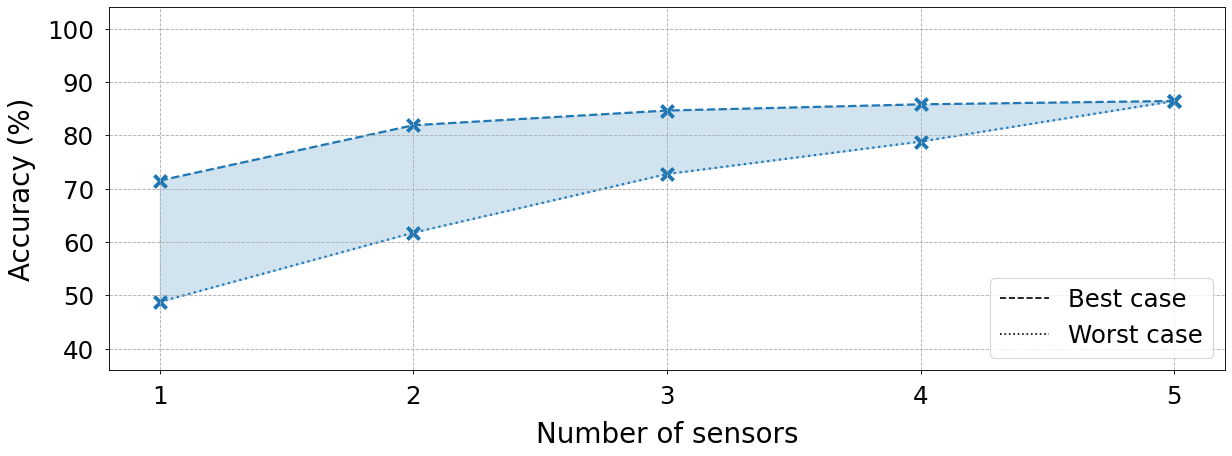

In [60]:

from matplotlib.lines import Line2D
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

#plt.title("Average sensor trace")

ax.set_xlabel('Number of sensors', fontsize=25, labelpad=10)
ax.set_ylabel('Accuracy (%)', fontsize=25, labelpad=10)

ax.set_xticks([1, 2, 3, 4, 5])
ax.grid(visible=True, which='major', linestyle='--')
ax.set_ylim([36, 104])

datasets = list(accuracies.dataset.unique())
datasets.remove("Exp-out1-random")
move = [0.132, 0.132, 0.132, 0.132, 0.132]
#move = [0.0, 0.0, 0.0, 0.0, 0.0]

#names = ['NOP templates', 'Random templates']

for dataset_id, dataset in enumerate(['Exp-in-nops']):
    
    accuracies_best = list(accuracies[(accuracies.dataset==dataset) & (accuracies.type=='best')].sort_values(['n_sensors'])['accuracy'])
    accuracies_worst = list(accuracies[(accuracies.dataset==dataset) & (accuracies.type=='worst')].sort_values(['n_sensors'])['accuracy'])

    ax.plot(range(1, 6, 1), accuracies_best, zorder=1, linewidth='2', linestyle='--', color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    ax.scatter(range(1, 6, 1), accuracies_best, zorder=1, marker="x", s=120, linewidths = 3.5, color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    ax.plot(range(1, 6, 1), accuracies_worst, zorder=1, linewidth='2', linestyle=':', color=colors[dataset_id])#, color="black")#, label="Including worst sensors")
    ax.scatter(range(1, 6, 1), accuracies_worst, zorder=1, marker="x", s=120, linewidths = 3.5, color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    #ax.scatter(range(1, 6, 1), accuracies_worst, zorder=1, marker=".", s=180, linewidths = 3.5, color=colors[dataset_id])#, color="black")#, label="Including best sensors")
    ax.fill_between(range(1, 6, 1), accuracies_best, accuracies_worst, alpha=0.2, color=colors[dataset_id])#, label=names[dataset_id])

    labels_best = list(accuracies[(accuracies.dataset==dataset) & (accuracies.type=='best')].sort_values(['n_sensors'])['label'])

    plt.rcParams.update({'font.size': 20})
    
    for i, txt in enumerate(labels_best):
        if(i!=0):
            txt = "+"+txt.rsplit(',', 1)[1]
        else:
            txt = "+"+txt
        #ax.annotate(txt, (i+1-move[i], accuracies_best[i]+2))
        #ax.annotate(txt, (i+1-move[i], accuracies_best[i]+3),weight="bold")#, bbox=dict(boxstyle='round', fc='white', alpha=0.7))

    plt.rcParams.update({'font.size': 22})

handles, labels = plt.gca().get_legend_handles_labels()
#
line1 = Line2D([0], [0], label='Best case', color='k', linestyle='--')
line2 = Line2D([0], [0], label='Worst case', color='k',linestyle=':')

handles.extend([line1,line2])

plt.legend(handles=handles, fontsize=22, loc=4)#,edgecolor='black',bbox_to_anchor=(1.011, 1.18))

file_path = "/media/SSD/paper_data/fig-sensor-accuracies.png"
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')